# Let's Grow More - Data Science Internship

Name - Zebaish Aftab

Task 2 - Stock market prediction and Forecasting using Stacked LSTM

Dataset - https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

In [4]:
#importing necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
#importing the dataset
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
data = pd.read_csv(url)

In [6]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [7]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [8]:
data.shape

(2035, 8)

In [9]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [11]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [12]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [13]:
data1 = data.reset_index()['Close']
data1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [14]:
data1.shape

(2035,)

# DATA VISUALIZATION

Text(0, 0.5, 'Y-axis')

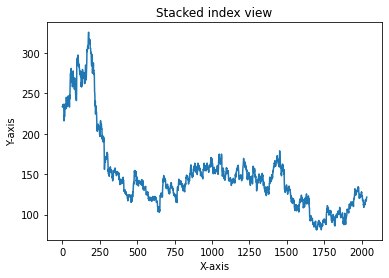

In [15]:
plt.plot(data1)
plt.title("Stacked index view")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

In [16]:
#MIN-MAX Scaler
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler(feature_range = (0,1))
data1 = scaler.fit_transform(np.array(data1).reshape(-1,1))

In [18]:
data1

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [19]:
data1.shape

(2035, 1)

In [20]:
#Train test split
train_size = int(len(data1)*0.65)
test_size = len(data1) - train_size
train_data, test_data = data1[0:train_size,:], data1[train_size:len(data1),:1]

In [22]:
train_data, test_data

(array([[0.62418301],
        [0.62214052],
        [0.62622549],
        ...,
        [0.25347222],
        [0.26041667],
        [0.2563317 ]]),
 array([[0.24652778],
        [0.23611111],
        [0.25204248],
        [0.25919118],
        [0.25776144],
        [0.2681781 ],
        [0.25449346],
        [0.27103758],
        [0.24530229],
        [0.26756536],
        [0.27267157],
        [0.26633987],
        [0.27410131],
        [0.28615196],
        [0.27818627],
        [0.27205882],
        [0.27124183],
        [0.27798203],
        [0.27083333],
        [0.25857843],
        [0.24285131],
        [0.2250817 ],
        [0.23447712],
        [0.24346405],
        [0.23611111],
        [0.22937092],
        [0.21527778],
        [0.20976307],
        [0.20751634],
        [0.2060866 ],
        [0.20445261],
        [0.20098039],
        [0.21180556],
        [0.19301471],
        [0.18974673],
        [0.20302288],
        [0.21752451],
        [0.20629085],
        [0.191584

In [21]:
def create_data(dataset,time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [22]:
time_step = 100
X_train, y_train = create_data(train_data,time_step)
X_test,y_test = create_data(test_data,time_step)

In [23]:
X_train

array([[0.62418301, 0.62214052, 0.62622549, ..., 0.83455882, 0.86213235,
        0.85273693],
       [0.62214052, 0.62622549, 0.63378268, ..., 0.86213235, 0.85273693,
        0.87111928],
       [0.62622549, 0.63378268, 0.62234477, ..., 0.85273693, 0.87111928,
        0.84497549],
       ...,
       [0.34517974, 0.31781046, 0.33047386, ..., 0.2816585 , 0.27001634,
        0.26531863],
       [0.31781046, 0.33047386, 0.32128268, ..., 0.27001634, 0.26531863,
        0.27389706],
       [0.33047386, 0.32128268, 0.34007353, ..., 0.26531863, 0.27389706,
        0.25347222]])

In [24]:
X_train.shape,y_test.shape

((1221, 100), (612,))

In [25]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [31]:
#stacked LSTM
#!pip install TensorFlow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [32]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = "mean_squared_error", optimizer = "adam")

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
20/20 [==============================] - 36s 670ms/step - loss: 0.0356 - val_loss: 0.0029
Epoch 2/100
20/20 [==============================] - 10s 490ms/step - loss: 0.0035 - val_loss: 0.0012
Epoch 3/100
20/20 [==============================] - 10s 506ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 4/100
20/20 [==============================] - 10s 502ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 5/100
20/20 [==============================] - 10s 510ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 6/100
20/20 [==============================] - 10s 517ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 7/100
20/20 [==============================] - 10s 502ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 8/100
20/20 [==============================] - 10s 498ms/step - loss: 0.0014 - val_loss: 9.5284e-04
Epoch 9/100
20/20 [==============================] - 10s 502ms/step - loss: 0.0012 - val_loss: 8.2624e-04
Epoch 10/100
20/20 [==============================] - 10s 510ms/step - los

In [35]:
#prediction
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

20/20 [==============================] - 2s 78ms/step


In [36]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [37]:
#root mean square performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

169.3355225813259

In [38]:
math.sqrt(mean_squared_error(y_test,test_predict))

117.84929143947505